Ref: https://www.tensorflow.org/tutorials/keras/classification

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [3]:
#load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loading the dataset returns four NumPy arrays:
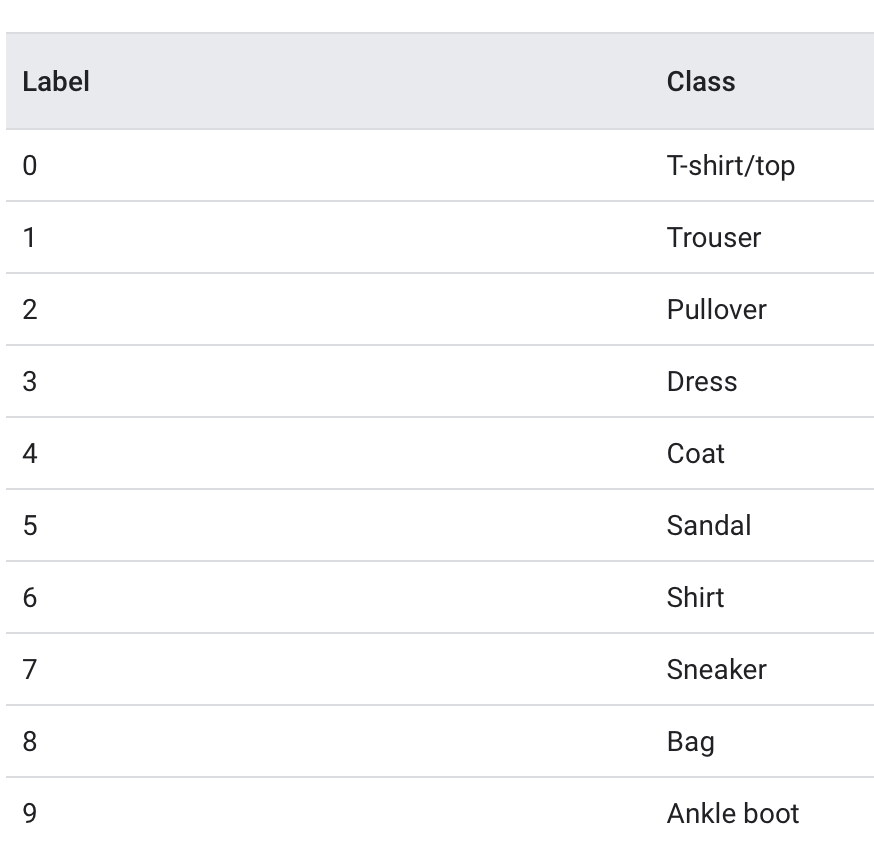

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

#Preprocess the data

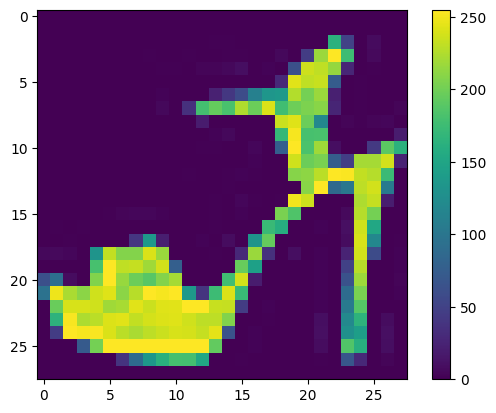

In [10]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255
test_images = test_images / 255

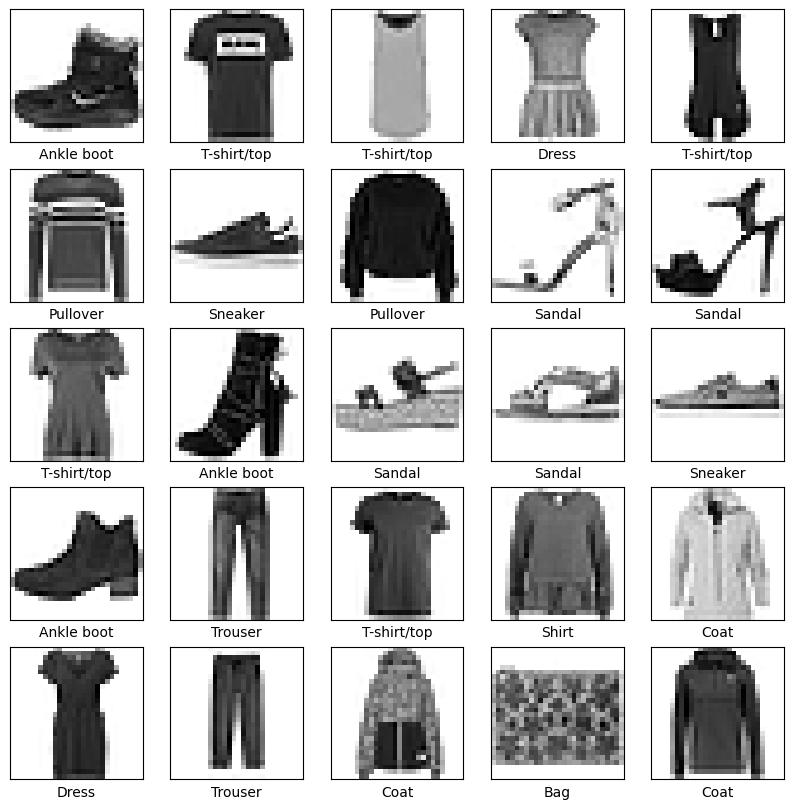

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Build the model

In [ ]:
#Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7831 - loss: 0.6277
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8635 - loss: 0.3831
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8750 - loss: 0.3386
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8834 - loss: 0.3158
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8911 - loss: 0.2956
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8967 - loss: 0.2802
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9000 - loss: 0.2670
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9077 - loss: 0.2515
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9081 - loss: 0.2455
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9144 - loss: 0.2316
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9156 - loss: 0.2290
Epoch 12/20
1875/1875 ━━━━━━

In [ ]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8861 - loss: 0.3508

Test accuracy: 0.8860999941825867


#Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
predictions[0]

array([4.4562688e-14, 1.8875797e-14, 2.0739024e-15, 6.1858599e-16,
       5.7748531e-14, 5.1983639e-06, 8.2565294e-16, 3.7908056e-04,
       2.5603469e-11, 9.9961573e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

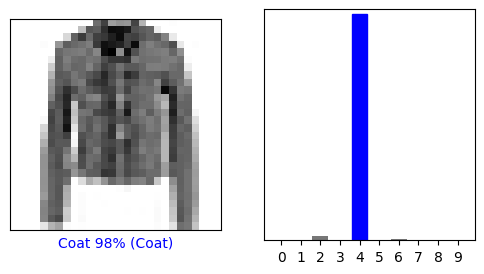

In [ ]:
i = 10 #12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

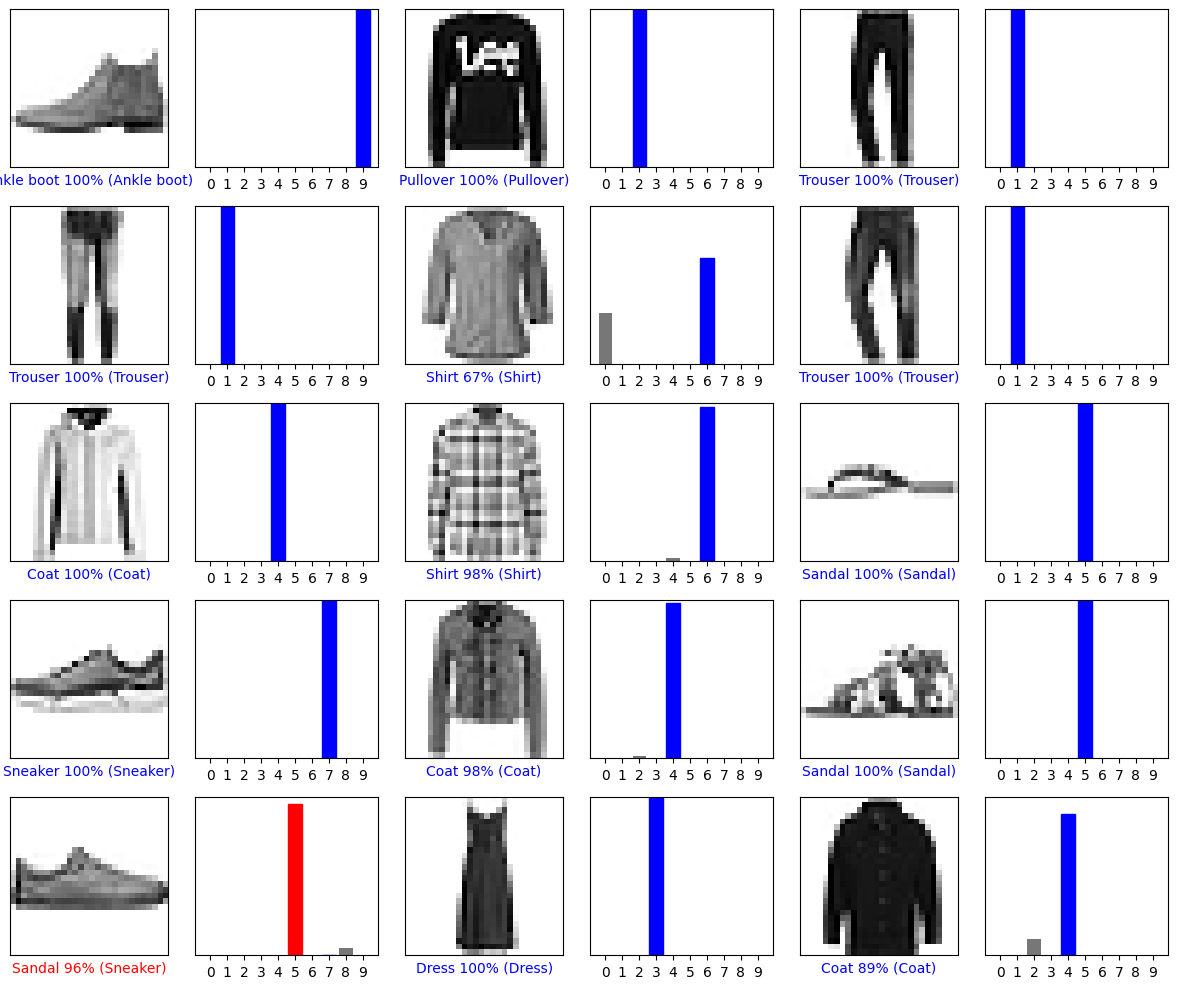

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[4.1488303e-05 1.5736232e-19 9.9773502e-01 8.4265870e-15 2.1907592e-03
  3.5535772e-10 3.2715448e-05 1.3262542e-11 2.1227169e-12 1.0126142e-19]]


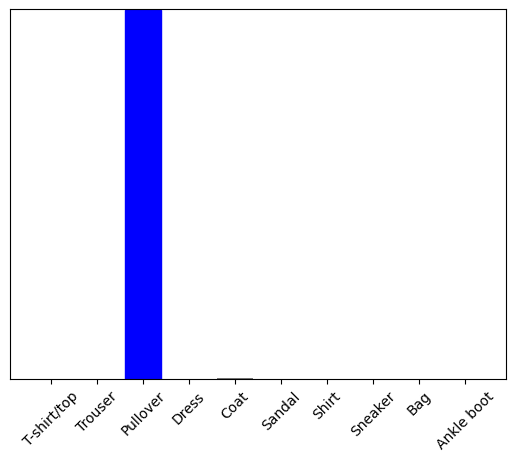

2

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
np.argmax(predictions_single[0])

### นำเข้า library modules  ที่ต้องใช้ในการสร้าง models

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### ประกาศตัวแปร list ไว้เก็บค่า accuracy และ ค่า loss ของ models ทั้งหมด

In [39]:
acc_values = []
loss_values = []
model_names = ["Neural Network", "Decision Tree", "KNN"]

### สร้างตัว model Neural Network

In [40]:
# กำหนดตัว object ของ model
model = Sequential()

# เพิ่ม layers ให้ models
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compile ตัว model

In [41]:
# compile model โดยเราใช้ ตัว optimizer เป็น adadelta
model.compile(optimizer='adadelta',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### train ตัว model

In [42]:
# กำหนดจำนวนรอบในการ train อยู่ที่ 30 รอบ
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1673 - loss: 2.2619
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3555 - loss: 1.9224
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4952 - loss: 1.6853
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5961 - loss: 1.5010
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6468 - loss: 1.3504
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6574 - loss: 1.2414
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6684 - loss: 1.1494
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6745 - loss: 1.0815
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6825 - loss: 1.0266
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6883 - loss: 0.9799
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6987 - loss: 0.9379
Epoch 12/30
1875/1875 ━━━━

### คำนวณค่า loss และ ค่า accuracy

In [43]:
# กำหนดค่าให้ 2 ทั้งแปรเพื่อรับค่า loss และ ค่า accuracy
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)

# แสดงผลค่า
print(f"Accuracy: {acc:.2f}")
print(f"Loss: {loss:.2f}")

# นำค่า loss และ ค่า accuracy ไปเก็บไว้ใน list เพื่อนำไป plot graph เส้นเปรียบเทียบ
acc_values.append(acc)
loss_values.append(loss)

313/313 - 1s - 2ms/step - accuracy: 0.7696 - loss: 0.6894
Accuracy: 0.77
Loss: 0.69


### เตรียมข้อมูล train และ test ให้กับ ML Models

In [44]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2)

### เปลี่ยน shape ของข้อมูล train และ test ใหม่ให้เป็น array 2 มิติเพื่อนำข้อมูลไป train

In [45]:
# ไม่สามารถ train ข้อมูล array 3 มิติได้ต้องแปลงเป็น array 2 มิติ ก่อน
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

## ML Model อันแรกที่ใช้คือ Decision Tree Model

### train model สำหรับ model DecisionTreee

In [46]:
dc_model = DecisionTreeClassifier()
dc_model.fit(x_train, y_train)

DecisionTreeClassifier()

### ให้ model ทำนายว่าควรอยู่ class ไหน

In [47]:
# model ทำนาย
y_pred = dc_model.predict(x_test)

# แสดงผลการทำนาย
print(np.argmax(y_pred[0]))
print(class_names[np.argmax(y_pred[0])])

0
T-shirt/top


### ให้ model ทำนายค่าความน่าจะเป็นของการทำนาย

In [48]:
# model ทำนายค่าความน่าจะเป็น
y_pred_prob = dc_model.predict_proba(x_test)
# แสดงผลค่าที่ได้มา
print(np.argmax(y_pred_prob))

4


### คำนวณค่า accuracy และ ค่า loss ของ decision tree

In [49]:
# คำนวณค่า accuracy และค่า loss ของตัว model
acc = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# แสดงผลค่า accuracy และค่า loss
print(f"Accuracy: {acc:,.2f}")
print(f"Loss: {loss:,.2f}")

# เก็บค่าที่คำนวณมาได้เพิ่มเข้าไปใน list
acc_values.append(acc)
loss_values.append(loss)

Accuracy: 0.80
Loss: 7.26


## ML Model อันที่สองที่ใช้คือ KNN

### train model สำหรับ model KNN

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2)
knn_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### ให้ model ทำนายว่าอยู่ class ไหน

In [51]:
# model ทำนาย
y_pred = knn_model.predict(x_test)

# แสดงผลการทำนาย
print(np.argmax(y_pred[0]))
print(class_names[np.argmax(y_pred[0])])

0
T-shirt/top


### ให้ model ทำนายค่าความน่าจะเป็นของการทำนาย

In [52]:
# model ทำนายค่าความน่าจะเป็น
y_pred_prob = knn_model.predict_proba(x_test)
# แสดงผลค่าที่ได้มา
print(np.argmax(y_pred_prob))

2


### คำนวณค่า accuracy และ ค่า loss ของ KNN

In [53]:
# คำนวณค่า accuracy และค่า loss ของตัว model
acc = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# แสดงผลค่า accuracy และค่า loss
print(f"Accuracy: {acc:,.2f}")
print(f"Loss: {loss:,.2f}")

# เก็บค่าที่คำนวณมาได้เพิ่มเข้าไปใน list
acc_values.append(acc)
loss_values.append(loss)

Accuracy: 0.85
Loss: 1.69


### plot กราฟเส้นเปรียบเทียบวัดค่า accuracy และ ค่า loss ของทั้ง 3 models

### กราฟเปรียบเทียบค่า accuracy

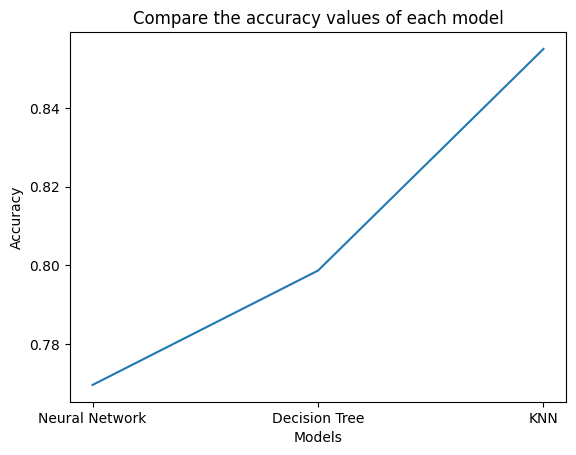

In [54]:
plt.title("Compare the accuracy values ​​of each model")
plt.plot(model_names, acc_values)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

### กราฟเปรียบเทียบค่า loss

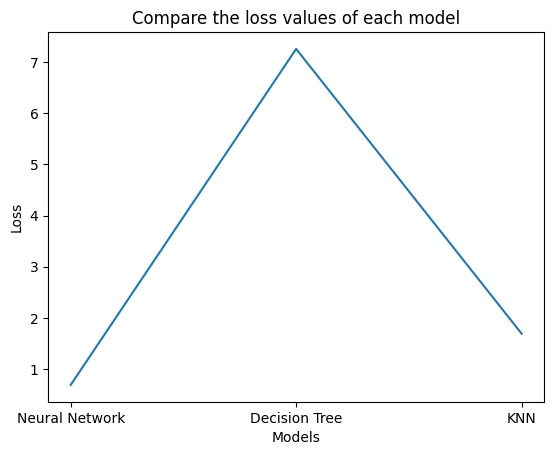

In [55]:
plt.title("Compare the loss values ​​of each model")
plt.plot(model_names, loss_values)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.show()